In [16]:
from PIL import Image
import numpy as np

def read_png_to_array(file_path, size=(45, 45)):
    # Open the image file
    img = Image.open(file_path)
    # Resize the image
    img = img.resize(size)
    # Convert the image to numpy array
    img_array = np.array(img)
    return img_array

# Usage
file_path = '/home/slaing/ML/2nd_year/sem2/xai/xai_seminar/tiger.png'
img_array = read_png_to_array(file_path)
print(img_array.shape)

(45, 45, 3)


In [23]:
file_path = '/home/slaing/ML/2nd_year/sem2/xai/xai_seminar/'
img_array = read_png_to_array(file_path + "tiger.png", size=((224,224)))

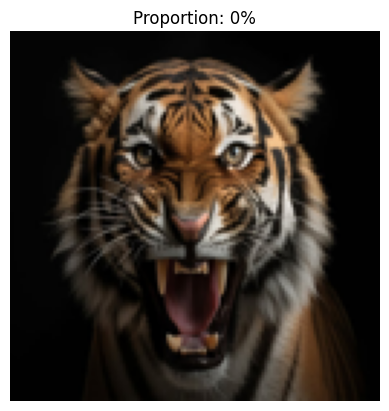

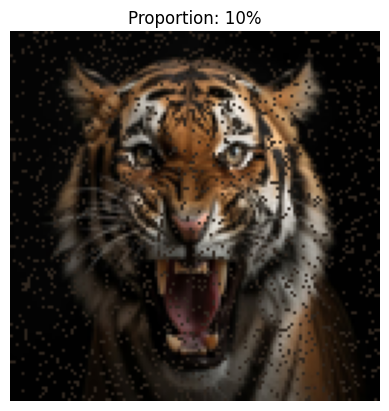

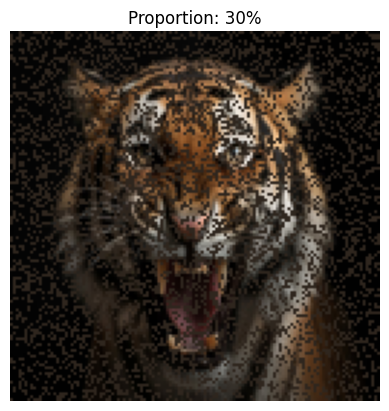

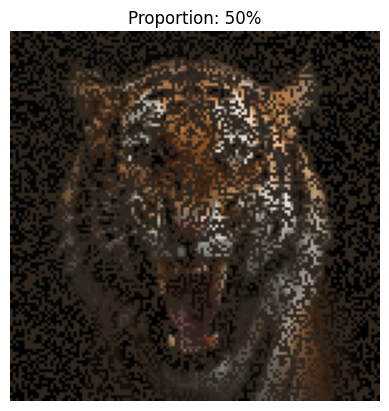

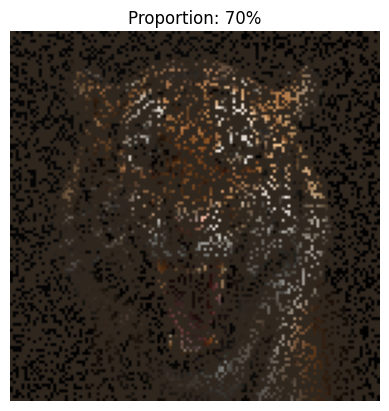

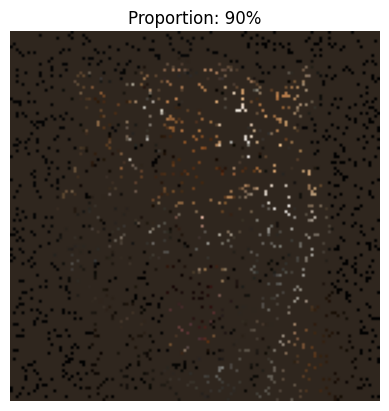

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean of each channel in the image
mean_values = img_array.mean(axis=(0, 1))

# Define the proportions
proportions = [0, 0.1, 0.3, 0.5, 0.7, 0.9]

# Generate a fixed sequence of random indices
w, h, c = img_array.shape
random_indices = np.random.permutation(w * h)
file_path = '/home/slaing/ML/2nd_year/sem2/xai/xai_seminar/'
# Loop over the proportions
for proportion in proportions:
    # Make a copy of the image array
    img_array_cpy = img_array.copy()

    # Calculate the number of pixels to replace
    num_pixels_to_replace = int(proportion * w * h)

    # Select pixels to replace
    pixels_to_replace = np.unravel_index(random_indices[:num_pixels_to_replace], (w, h))

    # Replace the selected pixels with the mean
    img_array_cpy[pixels_to_replace] = mean_values

    # Plot the modified image
    plt.figure()
    plt.imshow(img_array_cpy)
    plt.title(f'Proportion: {int(100*proportion)}%')
    plt.axis('off')
    #plt.savefig(file_path + f'tiger{proportion}.png')
    plt.show()

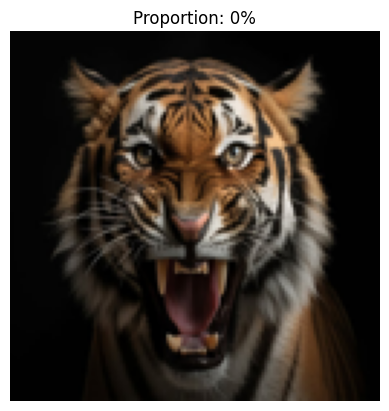

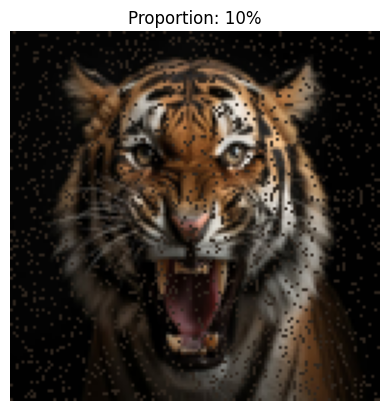

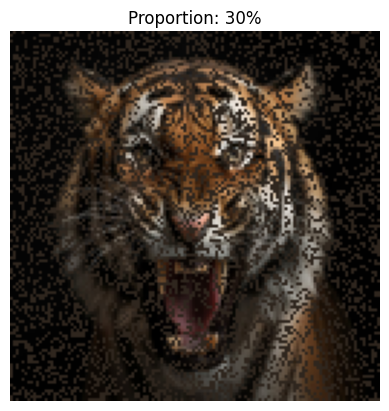

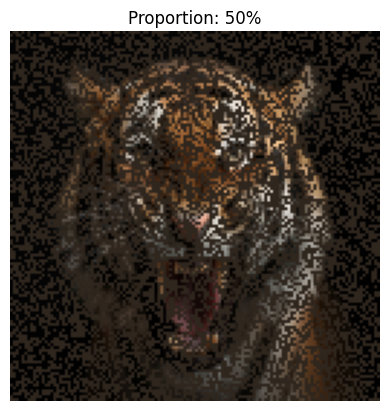

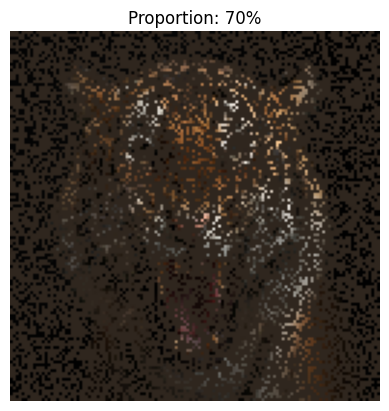

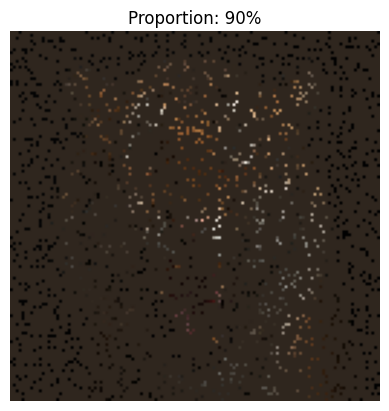

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Calculate the mean of each channel in the image
mean_values = img_array.mean(axis=(0, 1))

# Define the proportions
proportions = [0, 0.1, 0.3, 0.5, 0.7, 0.9]

# Generate a probability map
w, h, c = img_array.shape
prob_map = np.zeros((w, h))
prob_map[w//2, h//2] = 1
prob_map = gaussian_filter(prob_map, sigma=min(w, h)//2)
prob_map = prob_map / prob_map.sum()

# Generate a sequence of random indices with higher probability for the center
random_indices = np.random.choice(w*h, size=w*h, replace=False, p=prob_map.ravel())

# Loop over the proportions
for proportion in proportions:
    # Make a copy of the image array
    img_array_cpy = img_array.copy()

    # Calculate the number of pixels to replace
    num_pixels_to_replace = int(proportion * w * h)

    # Select pixels to replace
    pixels_to_replace = np.unravel_index(random_indices[:num_pixels_to_replace], (w, h))

    # Replace the selected pixels with the mean
    img_array_cpy[pixels_to_replace] = mean_values

    # Plot the modified image
    plt.figure()
    plt.imshow(img_array_cpy)
    plt.title(f'Proportion: {int(100*proportion)}%')
    plt.axis('off')
    #plt.savefig(file_path + f'tiger{proportion}.png')
    plt.show()

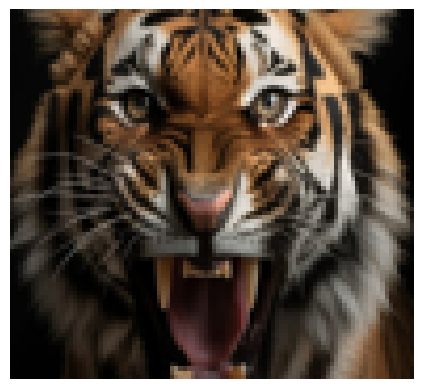

In [114]:
plt.imshow(img_array_bulk)
plt.axis('off')
plt.show()

In [115]:
import numpy as np


# Define the subarray indices
row_start, row_end = 16, 128-16
col_start, col_end = 32, 128-32

# Calculate the total number of pixels in the subarray
total_pixels = (row_end - row_start) * (col_end - col_start)

# Generate T random indices within the subarray
T = 1000  # replace with your desired value
random_indices = np.random.choice(total_pixels, T, replace=False)

# Convert the 1D indices to 2D indices within the subarray
rows, cols = np.unravel_index(random_indices, (row_end - row_start, col_end - col_start))

# Adjust the indices to match the original array
rows += row_start
cols += col_start

# Calculate the mean of the image array
mean_value = np.mean(img_array_bulk)

# Replace the pixels at the random indices with the mean
img_array[rows, cols] = mean_value

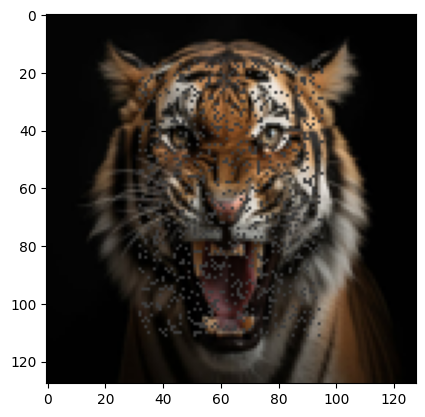

In [116]:
plt.imshow(img_array)

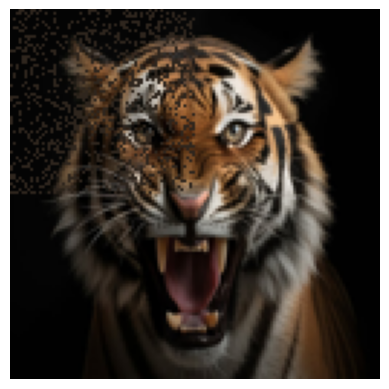

In [84]:
# replace 100 of the pixels with the mean value
frac = 0.4
N_pixels = int(frac * 128 * 128)

for i in range(1000):
    x = np.random.randint(0, 64)
    y = np.random.randint(0, 64)
    img_array_cpy[x, y] = mean

plt.imshow(img_array_cpy)
plt.axis('off')
plt.show()

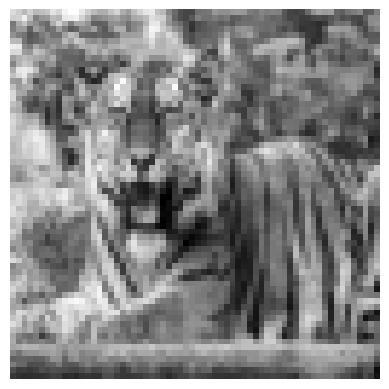

In [61]:
gray = np.mean(img_array, axis=2)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()


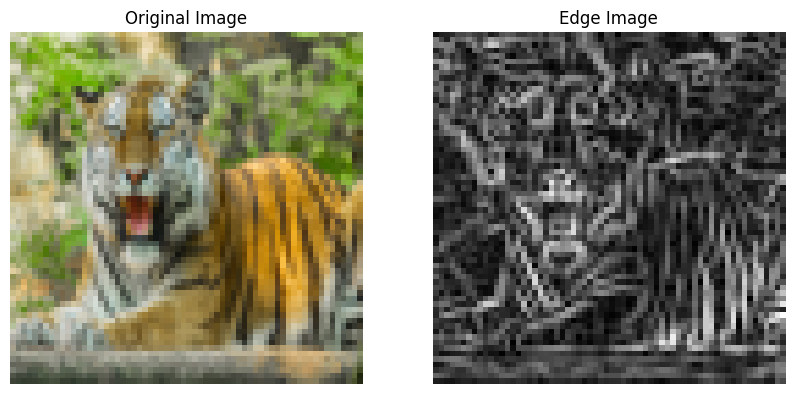

In [62]:
from scipy import ndimage


dx = ndimage.sobel(gray, 0)  # horizontal derivative
dy = ndimage.sobel(gray, 1)  # vertical derivative
mag = np.hypot(dx, dy)  # magnitude
mag *= 255.0 / np.max(mag)  # normalize (Q&D)

# Display the image and the edges side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img_array_cpy, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(mag, cmap='gray'), plt.title('Edge Image'), plt.axis('off')
plt.show()

In [56]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Assuming img_array_cpy is your image array
# Convert the image to grayscale so that it is a width x height array
img_array_cpy_g = np.dot(img_array_cpy[...,:3], [0.2989, 0.5870, 0.1140])



array([202.4885, 195.6434, 181.44  , ...,  83.3586,  72.7958,  36.5805])

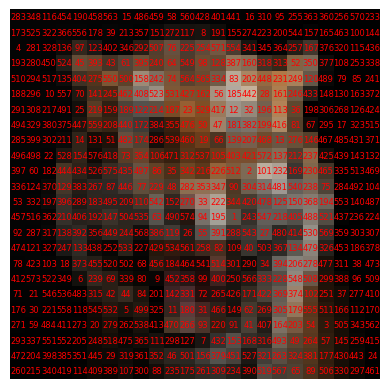

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming img_array is your image array
height, width = img_array.shape[:2]

# Generate a sequence of unique random numbers
random_numbers = np.random.permutation(np.arange(1, width*height+1))

# Reshape the sequence to the shape of the image
random_image = random_numbers.reshape((height, width))

plt.imshow(img_array)
plt.axis('off')

# Loop over data and draw text
for x in range(width):
    for y in range(height):
        value = random_image[y, x]
        plt.text(x, y, str(int(value)), color='red', ha='center', va='center', fontsize=6)

plt.show()

In [24]:
24*24

576